## Decision Tree

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
)

In [3]:
# --------------------------------------
# 1. Load Dataset 
# --------------------------------------
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

In [4]:
# --------------------------------------
# 2. Exploratory Data Analysis (EDA)
# --------------------------------------
print(df.info())
print(df.describe())
print(df.isnull().sum())  # Check for missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

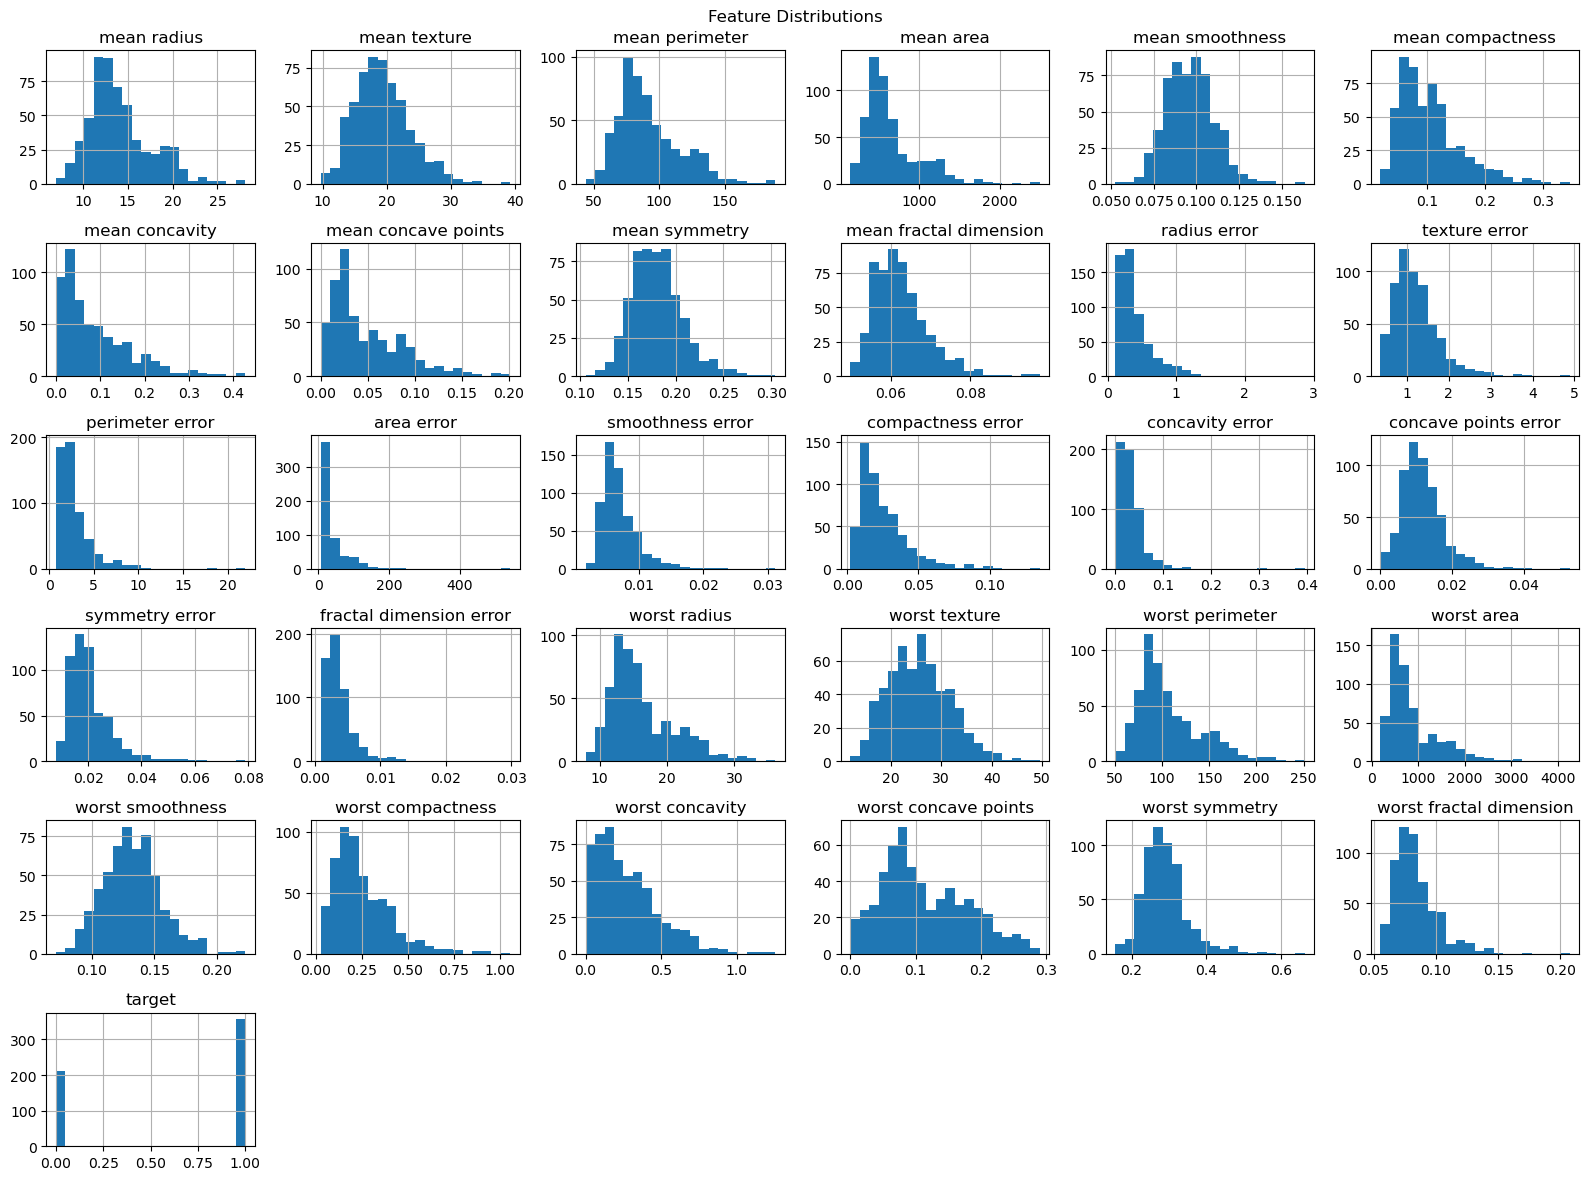

In [5]:
# Plot distributions
df.hist(bins=20, figsize=(16, 12))
plt.suptitle("Feature Distributions")
plt.tight_layout()
plt.show()

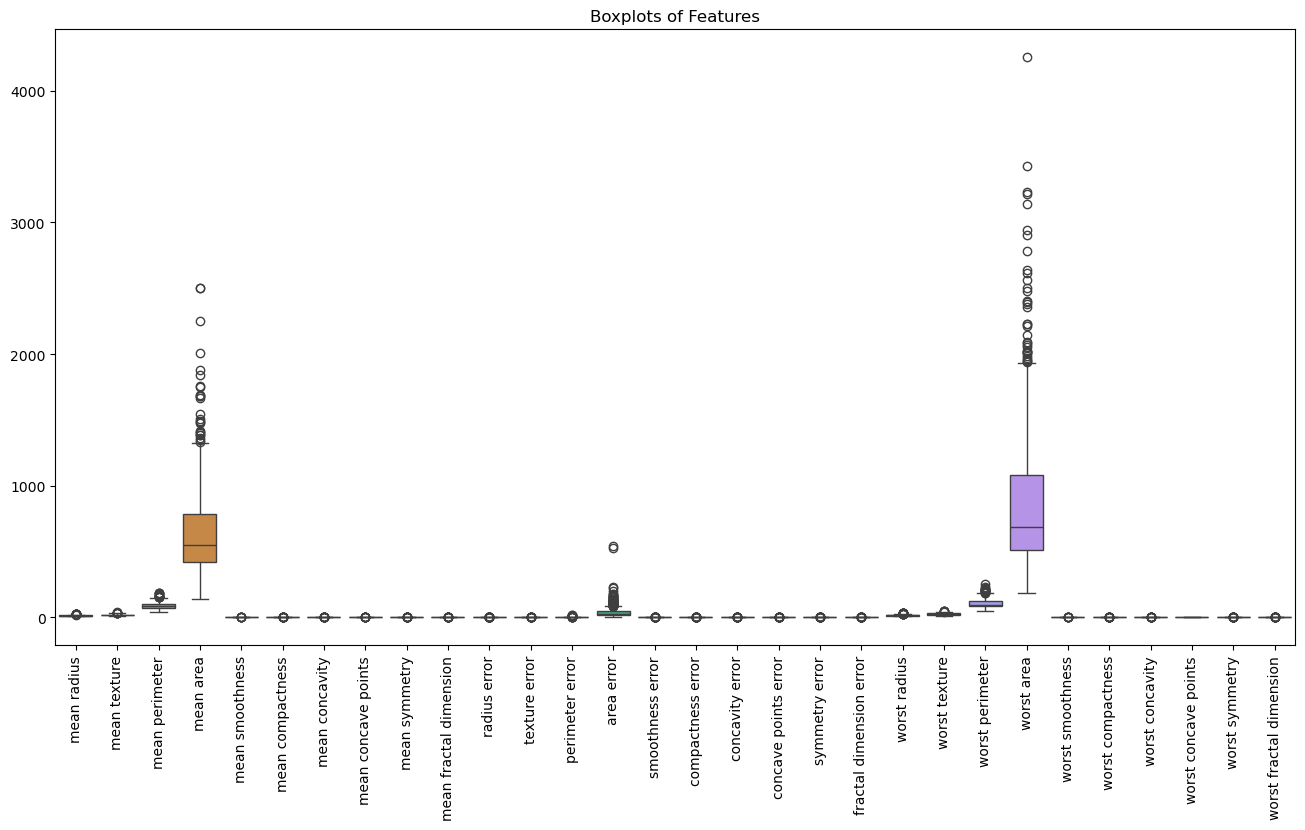

In [6]:
# Boxplot to detect outliers
plt.figure(figsize=(16, 8))
sns.boxplot(data=df.iloc[:, :-1])
plt.xticks(rotation=90)
plt.title("Boxplots of Features")
plt.show()

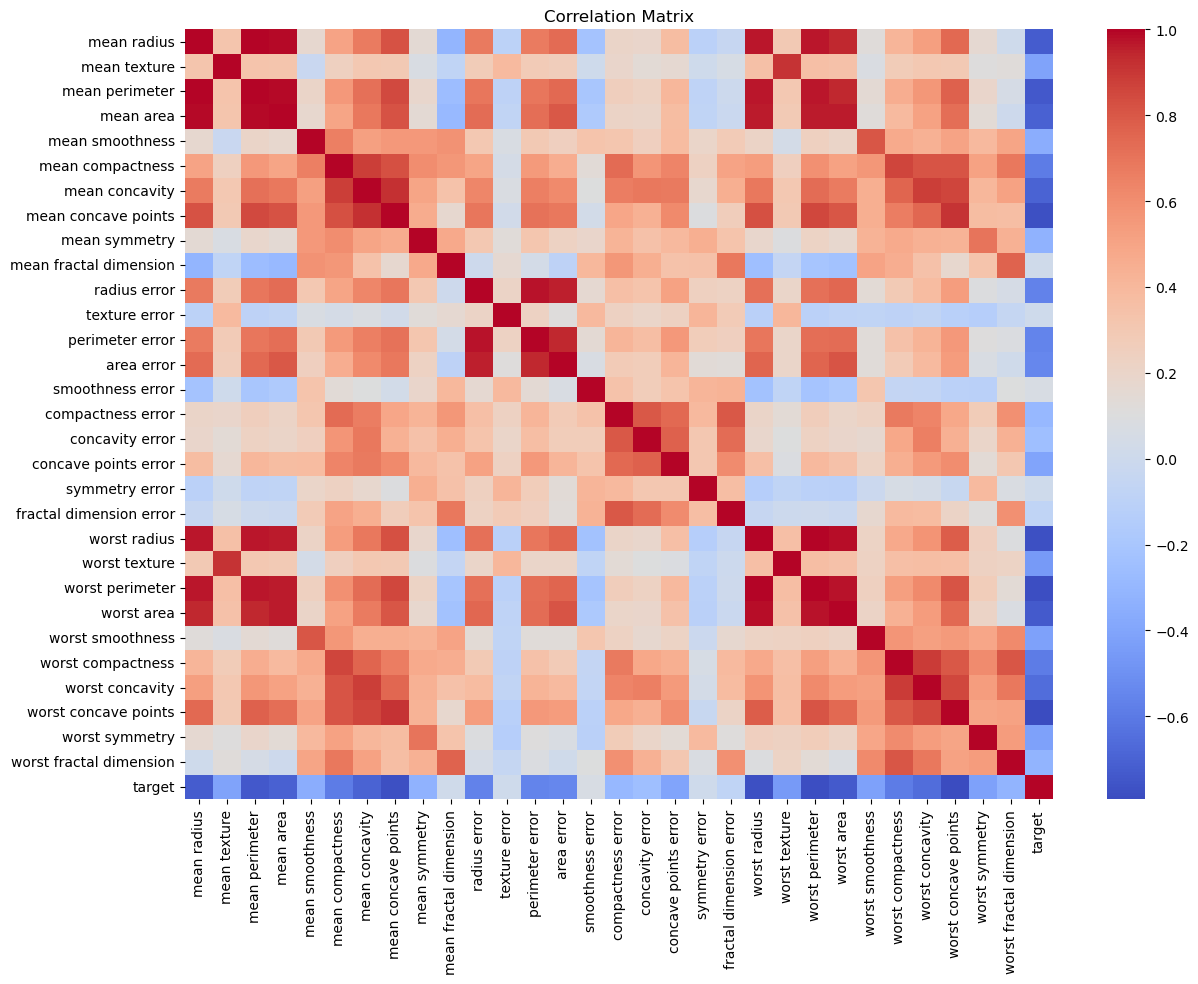

In [7]:
# Correlation matrix
plt.figure(figsize=(14, 10))
sns.heatmap(df.corr(), annot=False, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

In [9]:
# --------------------------------------
# 4. Decision Tree Classification
# --------------------------------------
X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [10]:
# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_pred))

Accuracy: 0.9473684210526315
Precision: 0.9577464788732394
Recall: 0.9577464788732394
F1 Score: 0.9577464788732394
ROC AUC: 0.9439895185063871


In [11]:
# Classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93        43
           1       0.96      0.96      0.96        71

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



In [12]:
# 5. Hyperparameter Tuning
# --------------------------------------
params = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}
grid = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid=params, cv=5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 10, None],
                         'min_samples_split': [2, 5, 10]})

In [13]:
print("\nBest Params:", grid.best_params_)
best_model = grid.best_estimator_
y_pred_best = best_model.predict(X_test)


Best Params: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 10}


In [14]:
# Re-evaluation
print("\nBest Model Accuracy:", accuracy_score(y_test, y_pred_best))
print("Best Model ROC AUC:", roc_auc_score(y_test, y_pred_best))


Best Model Accuracy: 0.956140350877193
Best Model ROC AUC: 0.9464461185718965


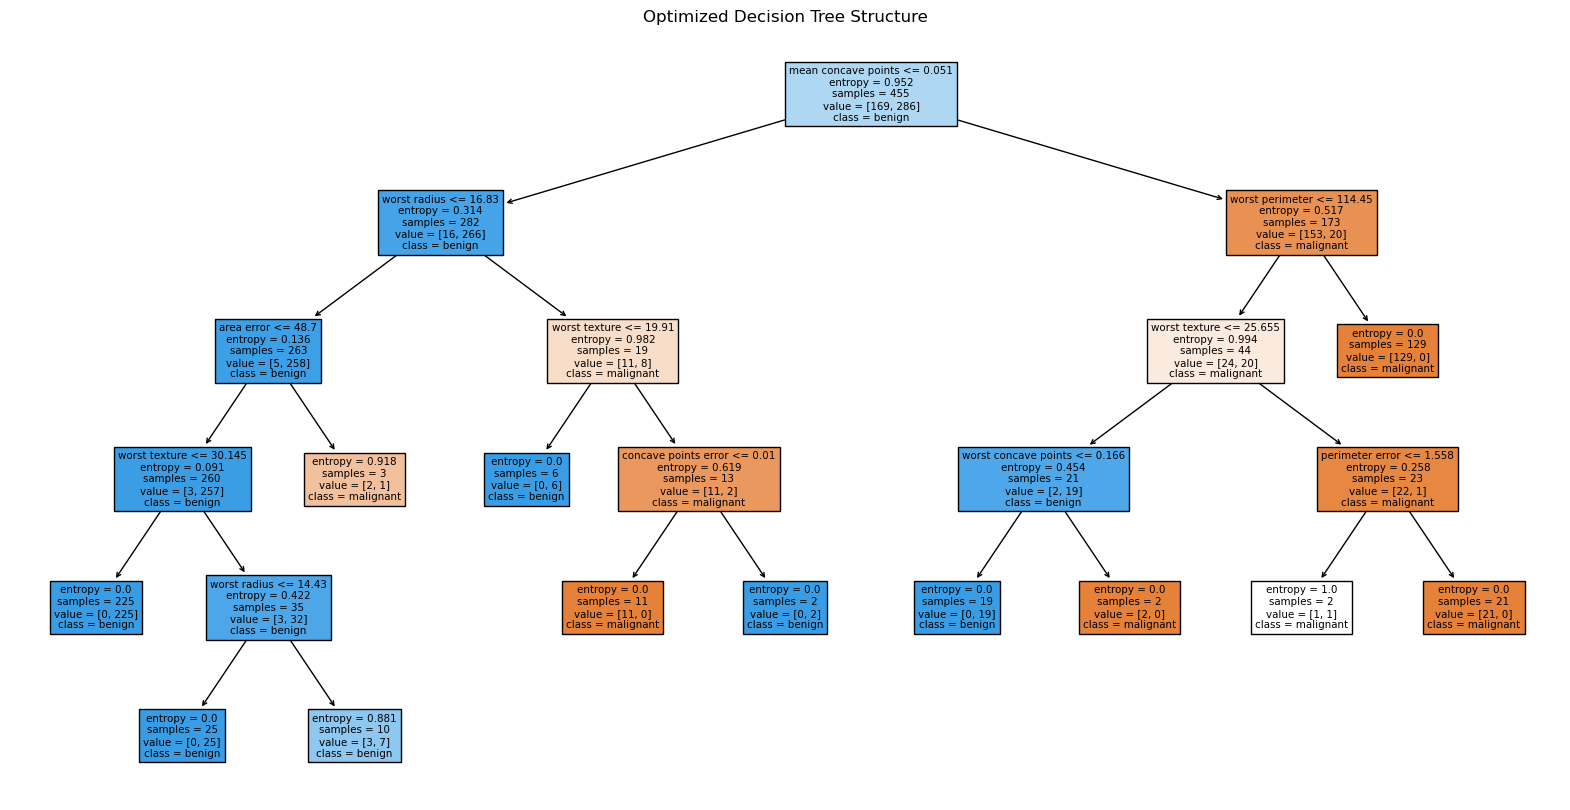

In [15]:
# 6. Visualize the Decision Tree
# --------------------------------------
plt.figure(figsize=(20, 10))
plot_tree(best_model, feature_names=X.columns, class_names=data.target_names, filled=True)
plt.title("Optimized Decision Tree Structure")
plt.show()

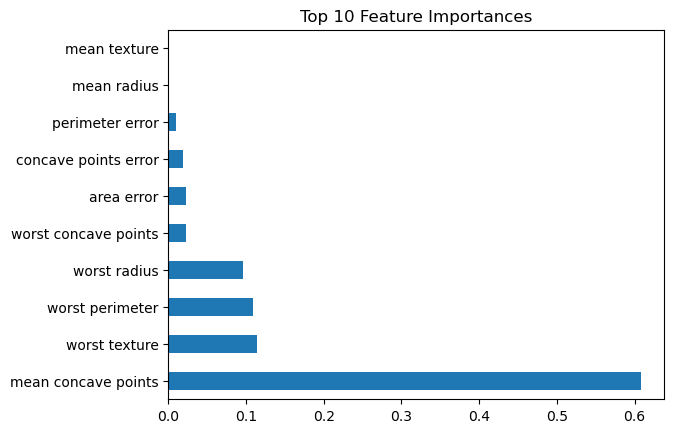

In [16]:
# Feature importances
feat_importances = pd.Series(best_model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.title("Top 10 Feature Importances")
plt.show()